# Clase 5: Ejemplo distribución Normal bi-variada

Prof. Tito Homem-de-Mello

## $X \sim N(20,5),\ Y \sim N(30,8),\ \rho=0.5 \Longrightarrow \Sigma=\begin{pmatrix} 25 & 20 \\ 20 & 64\end{pmatrix}$

In [ ]:
#install.packages('ggplot2')
install.packages('mvtnorm')
install.packages('data.table')


In [ ]:
library(ggplot2)
library(data.table)

In [ ]:
mu <- matrix(c(20,30),nrow=2)
Sigma <- matrix(c(25,20,20,64),nrow=2)  #Como visto en clase
C <- chol(Sigma)
C

### Verifiquemos si $C*C^T=\Sigma$

In [78]:
C%*%t(C)   #En R el producto matricial se indica por %*%, t(C) es la matriz transpuesta  de C 

41.00000,27.71281
27.71281,48.00000


### No es igual a $\Sigma$! El problema es que la matriz $C$ es triangular SUPERIOR, no inferior como visto en clase.

### Tomemos la transpuesta de $C$ y re-calculemos

In [79]:
C <- t(C)
C
C%*%t(C)

5,0.000000
4,6.928203


25,20
20,64


### Generemos una muestra de $Z=(X,Y)$

In [ ]:
W <- matrix(rnorm(2,0,1),nrow=2)  
Z <- mu + C%*%W
Z

### Generemos $N$ muestras de $Z$

In [80]:
N <- 1000
W <- matrix(rnorm(2*N,0,1),nrow=2) 
Z <- matrix(rep(mu,N),nrow=2) +C%*%W

Zd <- data.table(t(Z))


In [84]:
names(Zd) <- c("X","Y")
head(Zd)

X,Y
<dbl>,<dbl>
20.45099,28.24245
22.12956,35.76902
20.12733,32.92564
20.12604,42.09897
17.34616,22.73950
21.80636,45.48431


### Chequeemos estadísticas de la muestra

In [85]:
muX <- mean(Zd$X)
muY <- mean(Zd$Y)
sX <- sd(Zd$X)
sY <- sd(Zd$Y)
rho_bar <- cor(Zd$X,Zd$Y)  #Correlacion entre las muestras de $X$ e $Y$
sprintf("X: media=%5.2f, sd=%5.2f", muX, sX)
sprintf("Y: media=%5.2f, sd=%5.2f", muY, sY)
sprintf("Corr(X,Y)=%5.2f",rho_bar)
Sigma_bar <- matrix(c(sX^2,rho_bar*sX*sY,rho_bar*sX*sY,sY^2),nrow=2)
sprintf("Matriz de covarianza estimada:")
Sigma_bar

[1] "X: media=20.18, sd= 5.05"

[1] "Y: media=30.21, sd= 8.05"

[1] "Corr(X,Y)= 0.51"

[1] "Matriz de covarianza estimada:"

25.49840,20.82986
20.82986,64.78032


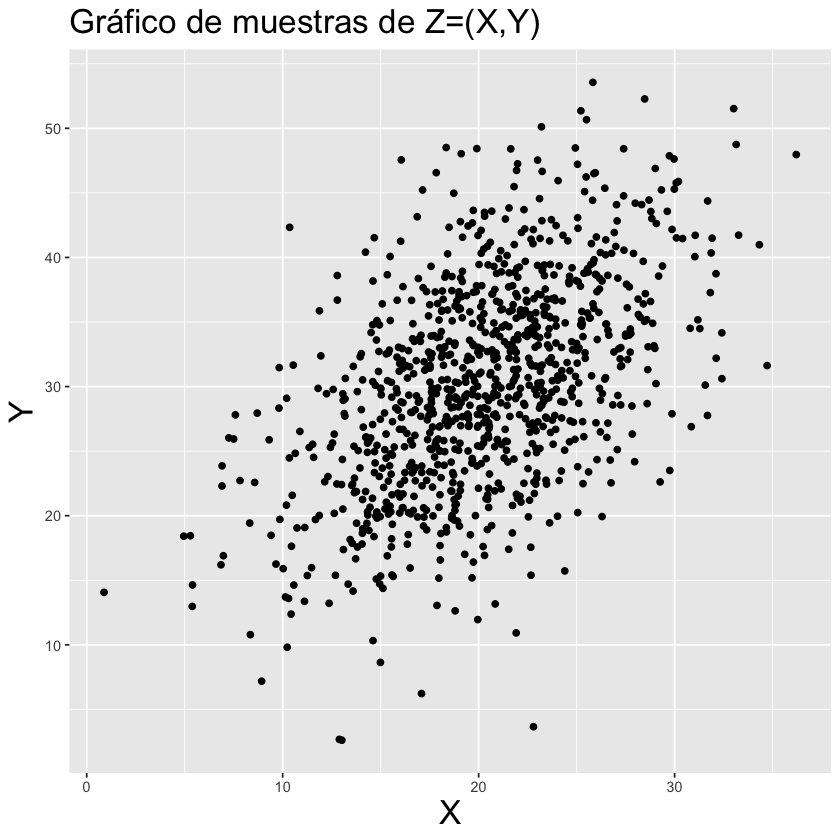

In [86]:
ggplot(Zd,aes(X,Y))+
    geom_point()+
    theme(plot.title = element_text(size = 20),
          axis.title.y=element_text(size = 20),
          axis.title.x=element_text(size = 20))+
    labs(y="Y",
         x="X",
         title="Gráfico de muestras de Z=(X,Y)")

In [ ]:
ggplot(Zd,aes(X))+
    geom_histogram(binwidth=4,color="black", fill="gray")+
    theme(plot.title = element_text(size = 20))+
    labs(title="Histograma de muestras de X")

ggplot(Zd,aes(Y))+
    geom_histogram(binwidth=4,color="black", fill="gray")+
    theme(plot.title = element_text(size = 20))+
    labs(title="Histograma de muestras de Y")

### Comparemos las respectivas distribuciones acumuladas

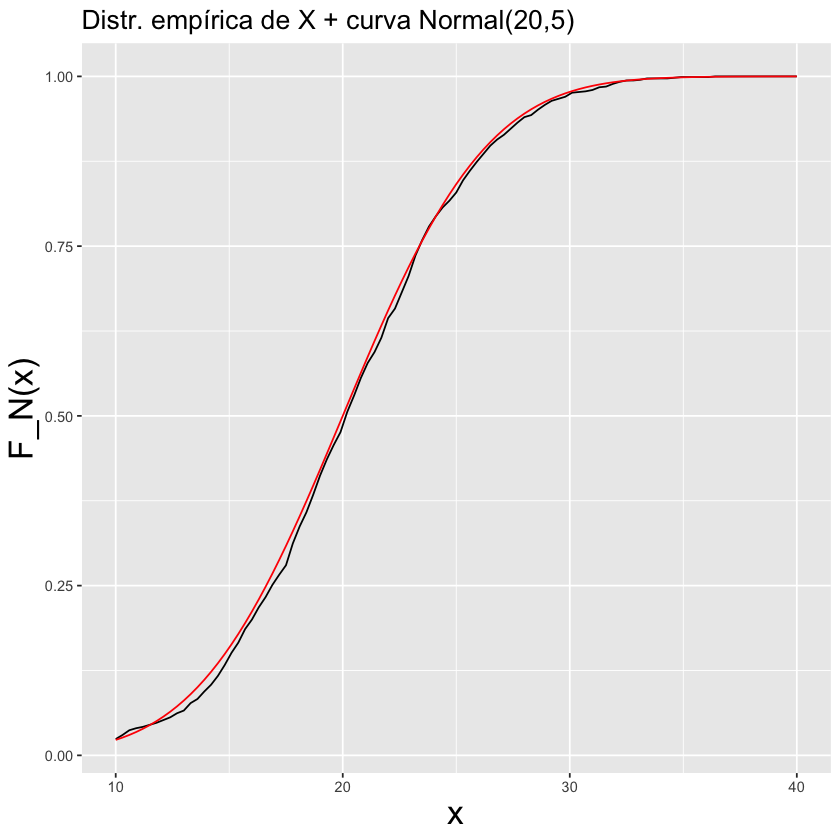

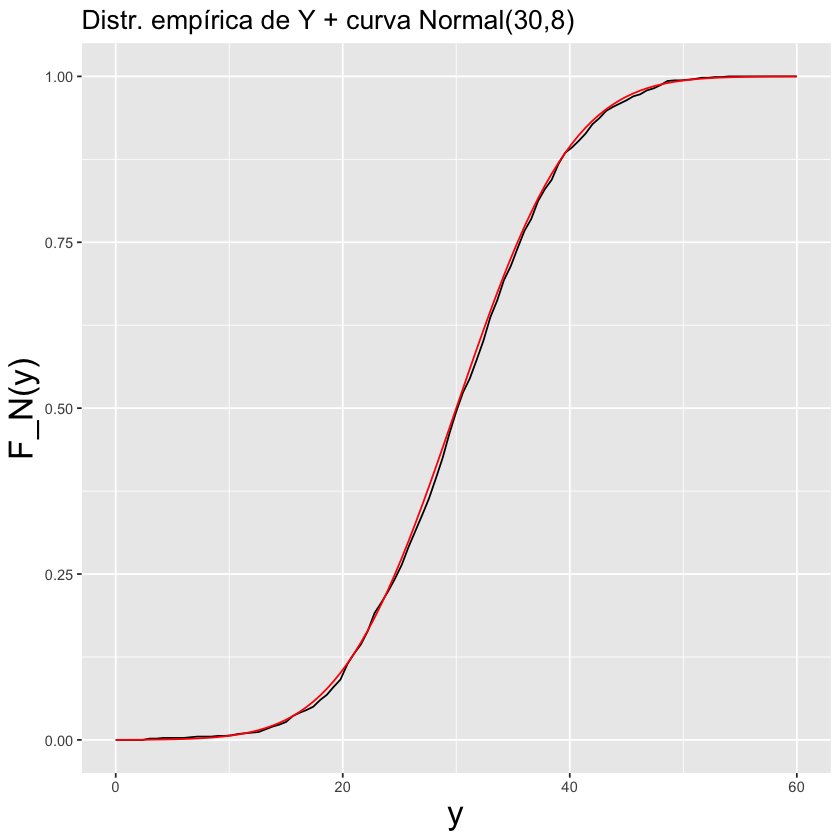

In [88]:
plotfig <- ggplot(Zd,aes(X,Y))+
        theme(plot.title = element_text(size = 16),
              axis.title.y=element_text(size = 20),
              axis.title.x=element_text(size = 20))

plotfig+geom_function(fun=ecdf(Zd[,X]), color="black")+
        geom_function(fun=pnorm,args=list(mu[1],sqrt(Sigma[1,1])),color="red")+
        xlim(10,40)+
        labs(x="x",y="F_N(x)", title="Distr. empírica de X + curva Normal(20,5)")
                      
plotfig+geom_function(fun=ecdf(Zd[,Y]), color="black")+
        geom_function(fun=pnorm,args=list(mu[2],sqrt(Sigma[2,2])),color="red")+
        xlim(0,60)+
        labs(x="y",y="F_N(y)",
        title=paste0("Distr. empírica de Y + curva Normal(30,8)")) 


### NOTA: En R hay una biblioteca que implementa el procedimiento descrito arriba. 

### A continuación se describe como generar las muestras de la Normal multivariada con esa biblioteca.

In [ ]:
library(mvtnorm)

Z <- rmvnorm(N, mu, Sigma)

Zd <- data.table(Z)
